<a href="https://colab.research.google.com/github/srinivasareddylella/OBISIP-TASK-1/blob/main/OIBSIP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")
df=df.drop(['Id'],axis=1)

In [49]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [50]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<BarContainer object of 150 artists>

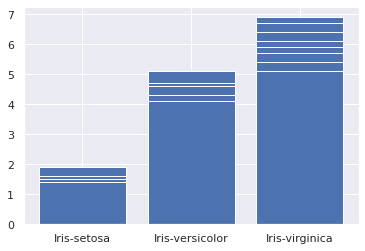

In [53]:
plt.bar(df['Species'],df['PetalLengthCm'])

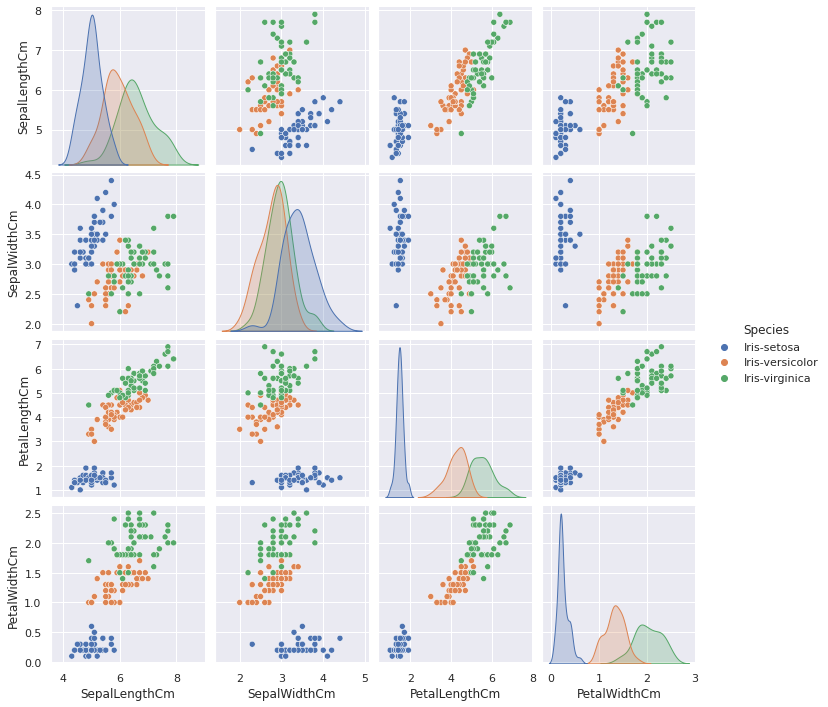

In [55]:
import seaborn as sns
sns.set()
sns.pairplot(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],hue='Species', diag_kind="kde")

In [58]:
x=df.drop(['Species'],axis=1)
y=df['Species']

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [60]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [66]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [67]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the model:' + str(round(accuracy, 2)) + ' %.')

Accuracy of the model:100.0 %.


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

prec = precision_score(y_test, y_pred,average='macro')
print("Precision:", prec)

# recall 
rec = recall_score(y_test, y_pred,average='macro')
print("Recall:", rec)

# f1-score
f1 = f1_score(y_test, y_pred,average='macro')
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [70]:
from sklearn.neighbors import KNeighborsClassifier
import joblib


knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


filename = 'trained_model.pkl'
joblib.dump(knn, filename)


iris_species = ['setosa', 'versicolor', 'virginica']
le.fit(iris_species)


filename_classes = "label_classes.pkl"
joblib.dump(le.classes_, filename_classes)

['label_classes.pkl']

In [73]:

model = joblib.load("trained_model.pkl")

le = LabelEncoder()
le.classes_ = joblib.load("label_classes.pkl")


new_data = [[3.5, 6.5, 2.7, 4.1]]



predictions = model.predict(new_data)


predictions = le.inverse_transform(predictions)

print(predictions)

['setosa']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
